### First let's import the required libraries

In [1]:
import pandas as pd # To be able to handle data with ease (by employing dataframe structure)
import numpy as np # To be able to treat the data as vectors
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split #To split the dataset into Train / Test fractures
%matplotlib inline 
import matplotlib.pyplot as plt # To visualize the data and model
import pylab as pl # To detail the visualizations
from sklearn.metrics import classification_report, confusion_matrix # To be able to employ the confusion matrix

from sklearn.linear_model import LogisticRegression

### Importing the data from the Internet
#### In this example, we help a telecommunications company understand who is leaving and why.

In [2]:
!wget -O ChurnData.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv

--2020-05-02 14:58:12--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36144 (35K) [text/csv]
Saving to: ‘ChurnData.csv’

100%[======================================>] 36,144      --.-K/s   in 0.08s   

2020-05-02 14:58:13 (422 KB/s) - ‘ChurnData.csv’ saved [36144/36144]



### Data Preprocessing

In [3]:
churnDF = pd.read_csv("ChurnData.csv")
churnDF = churnDF[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churnDF['churn'] = churnDF['churn'].astype('int')
churnDF.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


### Splitting our dataset into Train / Test

In [4]:
x = np.asarray(churnDF[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y = np.asarray(churnDF['churn'])

xTrain, xTest, yTrain, yTest = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', xTrain.shape,  yTrain.shape)
print ('Test set:', xTest.shape,  yTest.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


In [6]:
LogReg = LogisticRegression(C=0.01, solver='liblinear').fit(xTrain,yTrain)

#### Now we can predict using our test

In [7]:
yHat = LogReg.predict(xTest)
yHat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

#### Now let's compare it with the actual yTest values 

In [8]:
yTest

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

### Evaluation

#### Confusion Matrix is an illustrative and neat way to do evaluation 

In [1]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

NameError: name 'plt' is not defined

Confusion matrix, without normalization
[[ 3 12]
 [ 1 24]]


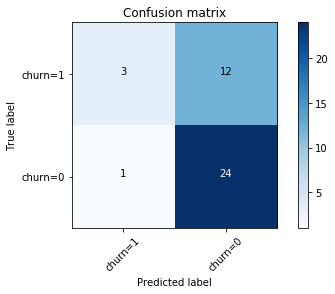

In [10]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(yTest, yHat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')